## DATA EXTRACTION

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
path = "C:\Users\hp\Downloads\compiled_even_wavelength_absorbance_data_sorted.xlsx"

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-5-ca9f0a165aec>, line 1)

In [ ]:
import os
import pandas as pd
import re

# Path to the folder with your 81 text files
folder_path = path

# Dictionary to hold Abs. values for each sample
data_dict = {}

# Loop through each .txt file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)

        # Skip the first line (title) and read the data
        df = pd.read_csv(file_path, skiprows=1)

        # Store Abs. values keyed by the sample name (filename without extension)
        sample_name = os.path.splitext(filename)[0]
        data_dict[sample_name] = df['Abs.'].values

# Get wavelength values from one sample file to use as column headers
sample_file = next(f for f in os.listdir(folder_path) if f.endswith('.txt'))
wavelengths = pd.read_csv(os.path.join(folder_path, sample_file), skiprows=1)['Wavelength nm.'].values

# Create a DataFrame: rows = samples, columns = wavelengths
data_df = pd.DataFrame.from_dict(data_dict, orient='index')
data_df.columns = wavelengths
data_df.index.name = 'Sample'
data_df.reset_index(inplace=True)

# Sort rows in ascending order of CS number
data_df['SampleNumber'] = data_df['Sample'].apply(lambda x: int(re.search(r'\d+', x).group()))
data_df.sort_values('SampleNumber', inplace=True)
data_df.drop(columns=['SampleNumber'], inplace=True)

# Save the DataFrame to an Excel file
output_file = os.path.join(folder_path, 'compiled_absorbance_data_sorted.xlsx')
data_df.to_excel(output_file, index=False)

print(f"Excel file created at: {output_file}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/DATA'

In [ ]:
import os
import pandas as pd
import re

# Path to the folder with your .txt files
folder_path = path

# Dictionary to store Abs. values for each sample
data_dict = {}

# Read and filter each file
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, skiprows=1)

        # Filter even wavelengths
        even_df = df[df['Wavelength nm.'] % 2 == 0]

        # Get sample name (e.g., "CS1", "CS81")
        sample_name = os.path.splitext(filename)[0]
        data_dict[sample_name] = even_df['Abs.'].values

# Get even wavelength values from one sample
sample_file = next(f for f in os.listdir(folder_path) if f.endswith('.txt'))
wavelengths = pd.read_csv(os.path.join(folder_path, sample_file), skiprows=1)
even_wavelengths = wavelengths[wavelengths['Wavelength nm.'] % 2 == 0]['Wavelength nm.'].values

# Create DataFrame from dictionary
df = pd.DataFrame.from_dict(data_dict, orient='index')
df.columns = even_wavelengths
df.index.name = 'Sample'
df.reset_index(inplace=True)

# Sort by CS number (extract digits and sort numerically)
df['SampleNumber'] = df['Sample'].apply(lambda x: int(re.search(r'\d+', x).group()))
df.sort_values('SampleNumber', inplace=True)
df.drop(columns=['SampleNumber'], inplace=True)

# Save to Excel
output_file = os.path.join(folder_path, 'compiled_even_wavelength_absorbance_data_sorted.xlsx')
df.to_excel(output_file, index=False)

print(f"Excel file saved at: {output_file}")


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/DATA/compiled_even_wavelength_absorbance_data_sorted.xlsx')

# ACTUAL MODELLING PART

## Data loading


In [1]:
path_to_CaseStudy = "CaseStudy.xlsx"

In [2]:
import pandas as pd
try:

    df=pd.read_excel(path_to_CaseStudy)
    display(df.head())
except FileNotFoundError:
    print("Error: 'CaseStudy.xlsx' not found. Please ensure the file exists in the current directory or provide the correct file path.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,S.No,PCM,CIP,TC,200,202,204,206,208,210,...,382,384,386,388,390,392,394,396,398,400
0,1,0.4,0.1,0.1,0.598,0.522,0.437,0.358,0.288,0.232,...,0.013,0.011,0.009,0.007,0.005,0.004,0.003,0.001,0.000,-0.001
1,2,0.4,0.1,0.5,0.604,0.520,0.427,0.340,0.266,0.206,...,0.014,0.012,0.010,0.008,0.006,0.005,0.004,0.003,0.002,0.001
2,3,0.4,0.1,2.0,1.423,1.271,1.132,1.020,0.924,0.853,...,0.297,0.251,0.208,0.167,0.129,0.095,0.065,0.040,0.018,0.001
3,4,0.4,0.5,0.1,0.748,0.671,0.585,0.502,0.428,0.366,...,0.020,0.017,0.015,0.013,0.010,0.009,0.007,0.006,0.005,0.004
4,5,0.4,0.5,0.5,0.905,0.819,0.727,0.642,0.565,0.502,...,0.080,0.070,0.060,0.051,0.042,0.034,0.028,0.022,0.017,0.013


In [3]:
if df is not None:
    df = df.drop(columns=['S.No'])
    display(df.head())
else:
    print("DataFrame 'df' is not properly initialized. Cannot proceed.")

,PCM,CIP,TC,200,202,204,206,208,210,212,...,382,384,386,388,390,392,394,396,398,400
0,0.4,0.1,0.1,0.598,0.522,0.437,0.358,0.288,0.232,0.192,...,0.013,0.011,0.009,0.007,0.005,0.004,0.003,0.001,0.000,-0.001
1,0.4,0.1,0.5,0.604,0.520,0.427,0.340,0.266,0.206,0.164,...,0.014,0.012,0.010,0.008,0.006,0.005,0.004,0.003,0.002,0.001
2,0.4,0.1,2.0,1.423,1.271,1.132,1.020,0.924,0.853,0.806,...,0.297,0.251,0.208,0.167,0.129,0.095,0.065,0.040,0.018,0.001
3,0.4,0.5,0.1,0.748,0.671,0.585,0.502,0.428,0.366,0.320,...,0.020,0.017,0.015,0.013,0.010,0.009,0.007,0.006,0.005,0.004
4,0.4,0.5,0.5,0.905,0.819,0.727,0.642,0.565,0.502,0.453,...,0.080,0.070,0.060,0.051,0.042,0.034,0.028,0.022,0.017,0.013


## Data exploration

### Subtask:
Explore the distributions of the 'PCM', 'CIP', and 'TC' columns.  Calculate descriptive statistics and examine correlations.


**Reasoning**:
Calculate descriptive statistics for 'PCM', 'CIP', and 'TC', visualize their distributions with histograms, compute the correlation matrix and visualize it as a heatmap, and examine correlations with other variables using scatter plots.  This addresses all parts of the current subtask.



             PCM        CIP         TC
count  79.000000  79.000000  79.000000
mean    0.741772   0.472152   0.598734
std     0.720685   0.385951   0.608802
min     0.000000   0.000000   0.000000
25%     0.100000   0.100000   0.100000
50%     0.500000   0.500000   0.500000
75%     1.000000   1.000000   1.000000
max     2.400000   1.000000   2.000000


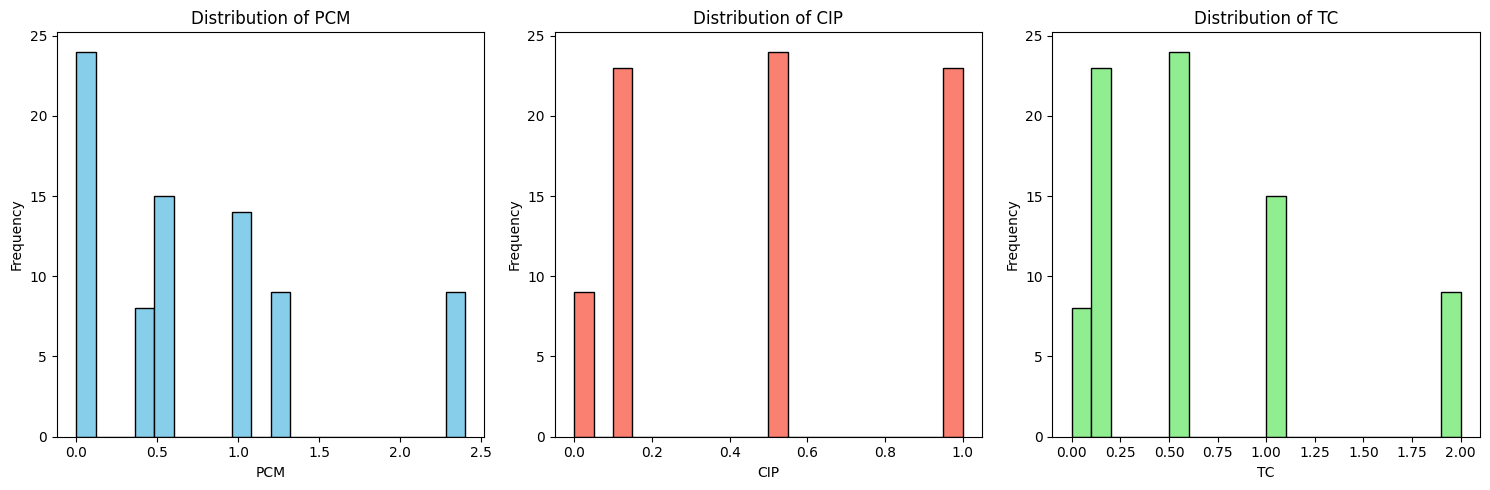

          PCM       CIP        TC
PCM  1.000000  0.058625  0.184502
CIP  0.058625  1.000000  0.015671
TC   0.184502  0.015671  1.000000


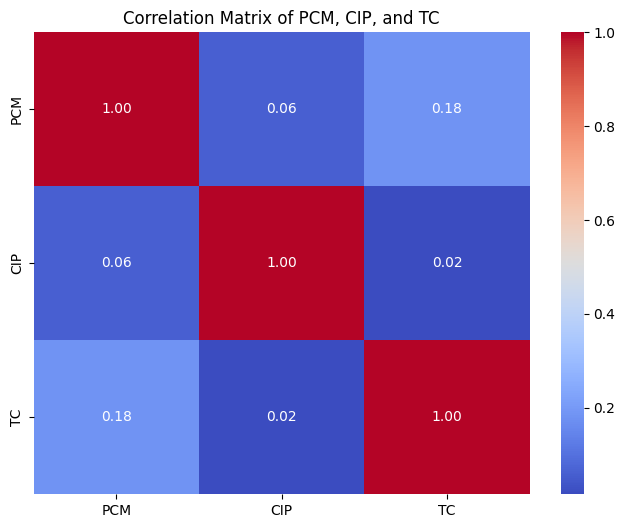

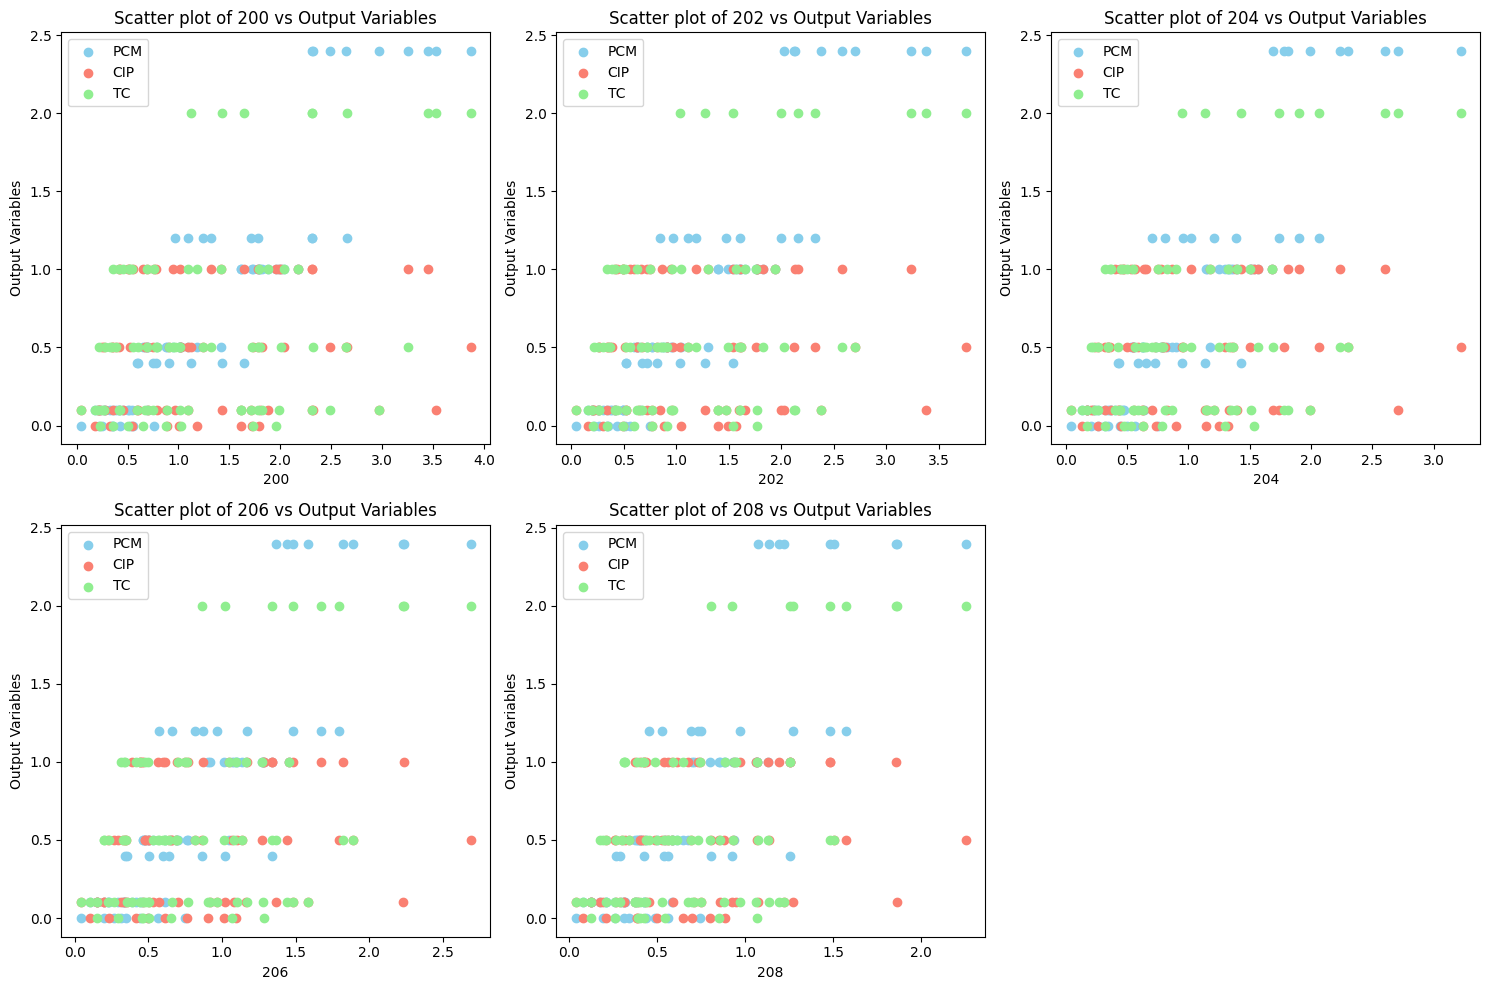

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print(df[['PCM', 'CIP', 'TC']].describe())

# Histograms
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['PCM'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of PCM')
plt.xlabel('PCM')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['CIP'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of CIP')
plt.xlabel('CIP')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['TC'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of TC')
plt.xlabel('TC')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation matrix and heatmap
correlation_matrix = df[['PCM', 'CIP', 'TC']].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of PCM, CIP, and TC')
plt.show()

# Scatter plots with other variables (example with the first 5 other columns)
other_columns = df.columns[3:8]  # Select the columns from index 3 up to 8 (excluding 8)
plt.figure(figsize=(15, 10))
for i, col in enumerate(other_columns):
    plt.subplot(2, 3, i + 1)
    plt.scatter(df[col], df['PCM'], color='skyblue', label='PCM')
    plt.scatter(df[col], df['CIP'], color='salmon', label='CIP')
    plt.scatter(df[col], df['TC'], color='lightgreen', label='TC')
    plt.xlabel(col)
    plt.ylabel('Output Variables')
    plt.title(f'Scatter plot of {col} vs Output Variables')
    plt.legend()

plt.tight_layout()
plt.show()

## Data visualization

### Subtask:
Visualize the distributions and relationships of the target variables ('PCM', 'CIP', 'TC') and explore their relationships with other relevant features.


**Reasoning**:
Generate the visualizations as per the instructions, focusing on distributions, relationships between target variables, relationships with other features, and box plots.



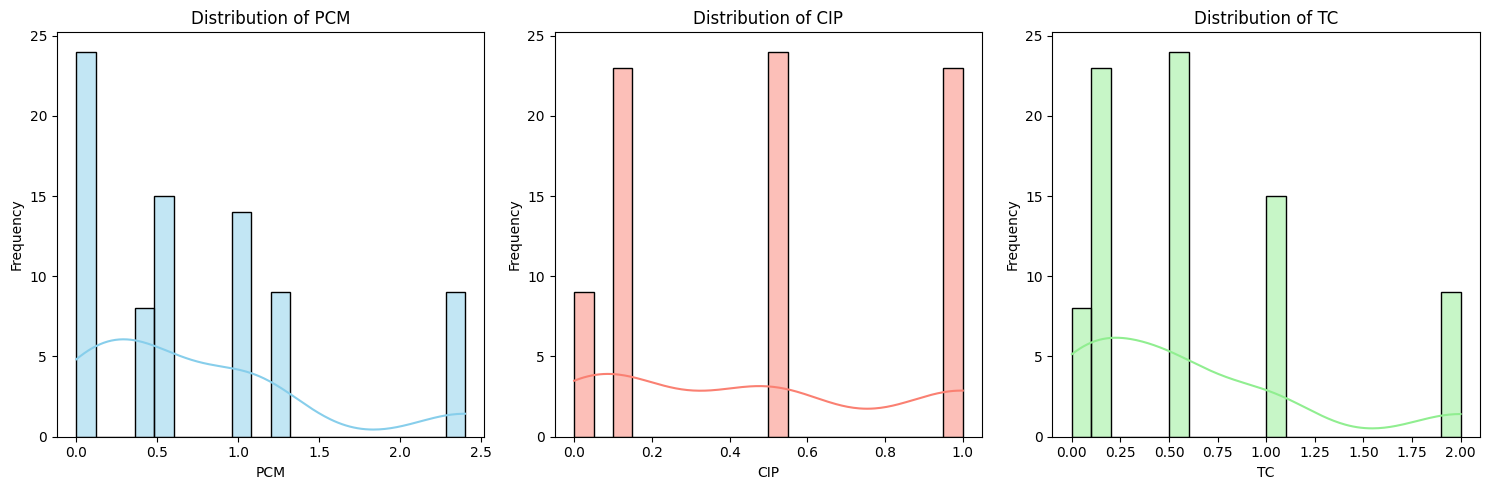

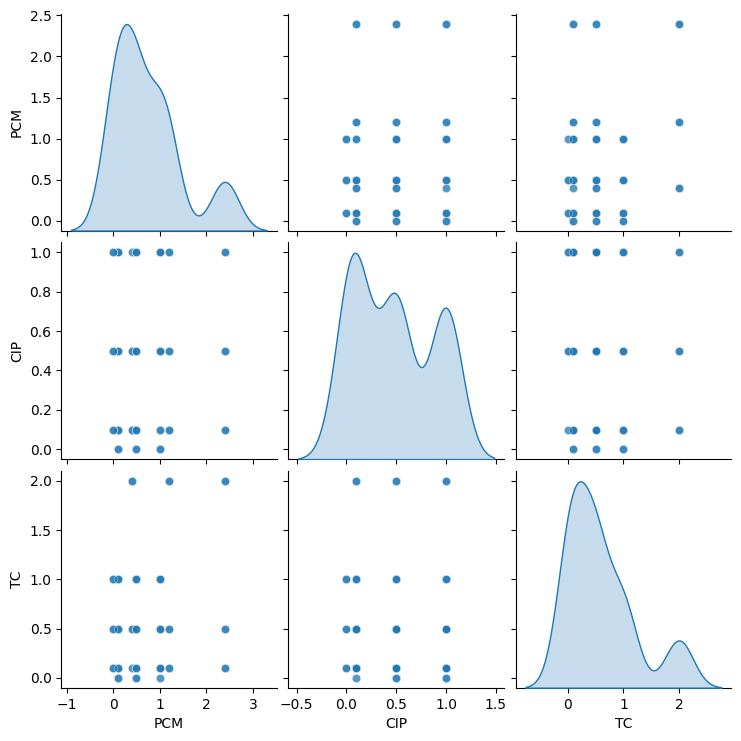

          PCM       CIP        TC
PCM  1.000000  0.058625  0.184502
CIP  0.058625  1.000000  0.015671
TC   0.184502  0.015671  1.000000


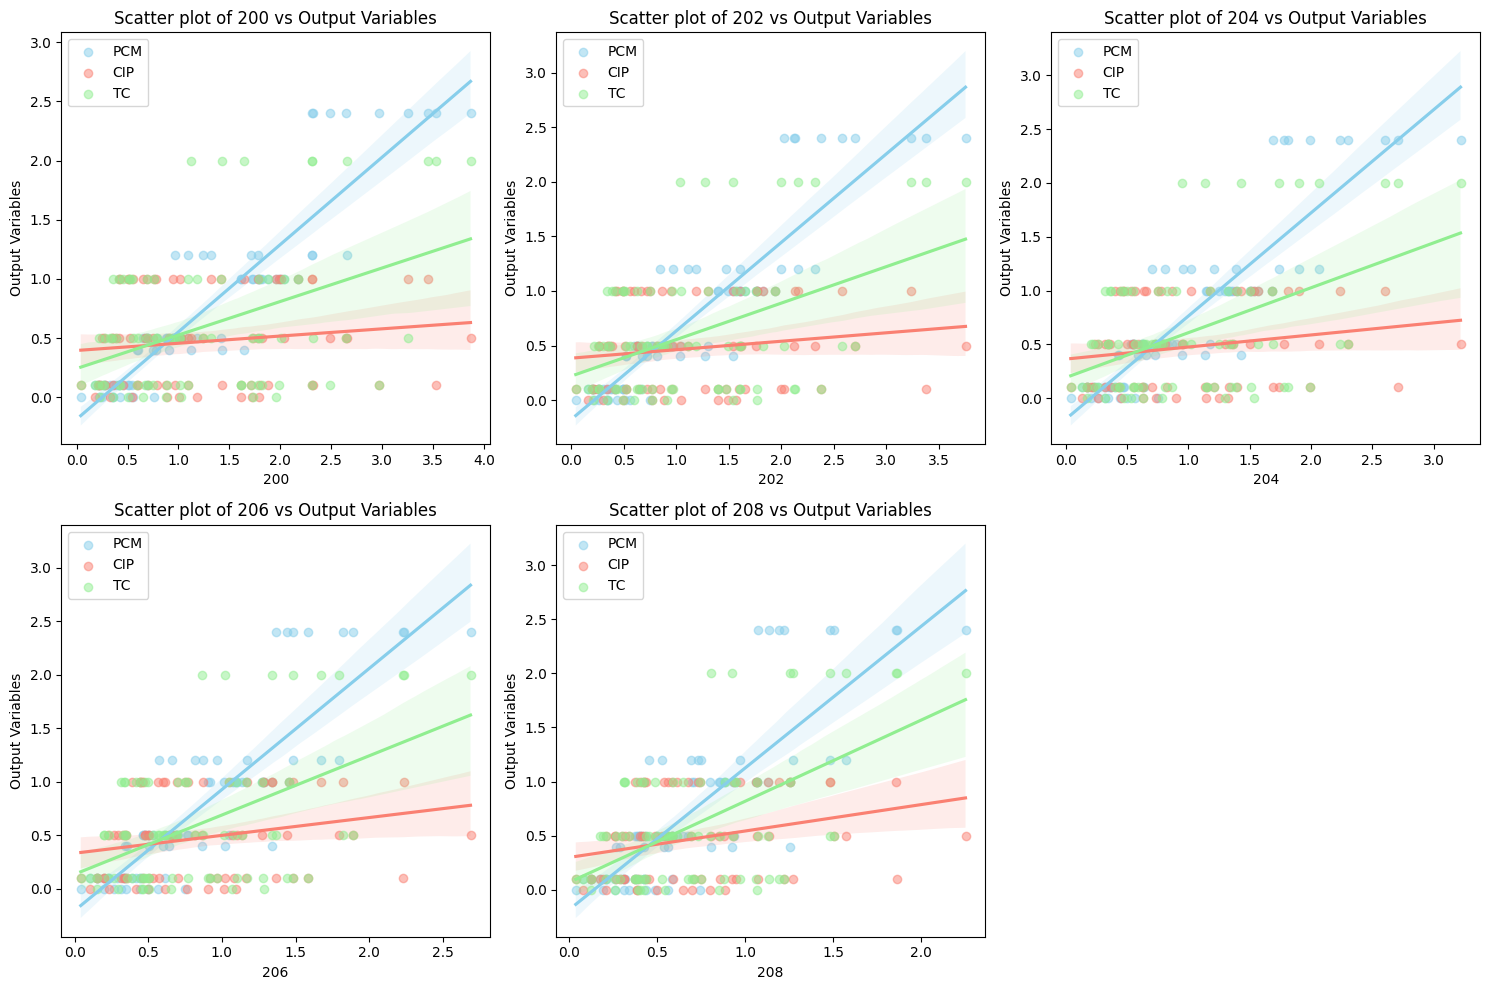

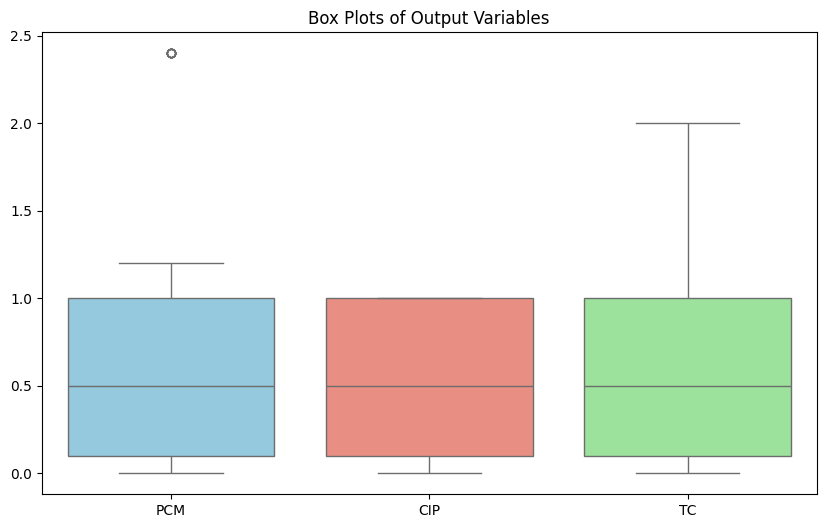

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distributions
plt.figure(figsize=(15, 5))
for i, col in enumerate(['PCM', 'CIP', 'TC']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20, color=['skyblue', 'salmon', 'lightgreen'][i])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Relationships between target variables
sns.pairplot(df[['PCM', 'CIP', 'TC']], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

# Calculate and display correlation coefficients
correlation_matrix = df[['PCM', 'CIP', 'TC']].corr()
print(correlation_matrix)


# Relationships with other features (example with first 5 features)
other_columns = df.columns[3:8]
plt.figure(figsize=(15, 10))
for i, col in enumerate(other_columns):
    plt.subplot(2, 3, i + 1)
    sns.regplot(x=df[col], y=df['PCM'], color='skyblue', label='PCM', scatter_kws={'alpha':0.5})
    sns.regplot(x=df[col], y=df['CIP'], color='salmon', label='CIP', scatter_kws={'alpha':0.5})
    sns.regplot(x=df[col], y=df['TC'], color='lightgreen', label='TC', scatter_kws={'alpha':0.5})
    plt.xlabel(col)
    plt.ylabel('Output Variables')
    plt.title(f'Scatter plot of {col} vs Output Variables')
    plt.legend()

plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['PCM', 'CIP', 'TC']], palette=['skyblue', 'salmon', 'lightgreen'])
plt.title('Box Plots of Output Variables')
plt.show()

## Feature engineering

### Subtask:
Engineer new features based on the insights gained from data exploration and visualization.  Prepare the data for model training.


**Reasoning**:
Engineer new features (polynomial features, interaction terms), scale features, and optionally transform target variables for model training.



In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Define features (X) and target variables (y)
X = df.drop(columns=['PCM', 'CIP', 'TC'])
y = df[['PCM', 'CIP', 'TC']]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Convert integer column names to strings
X_imputed_df.columns = X_imputed_df.columns.astype(str)

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_imputed_df)
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X_imputed_df.columns))

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly_df)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_poly_df.columns)

# Concatenate scaled features with target variables
processed_df = pd.concat([X_scaled_df, y], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(processed_df.drop(columns=['PCM', 'CIP', 'TC']),
                                                    processed_df[['PCM', 'CIP', 'TC']],
                                                    test_size=0.2, random_state=42)

In [6]:
X = df.drop(columns=['PCM', 'CIP', 'TC'])
y = df[['PCM', 'CIP', 'TC']]

## Model training

### Subtask:
Train separate regression models for 'PCM', 'CIP', and 'TC'.


**Reasoning**:
Train three separate regression models (Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor) for each target variable ('PCM', 'CIP', 'TC').



In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

linear_regression_models = {}
random_forest_models = {}
gradient_boosting_models = {}

for target in ['PCM', 'CIP', 'TC']:
    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train[target])
    linear_regression_models[target] = linear_model

    # Random Forest Regressor
    random_forest_model = RandomForestRegressor(random_state=42)
    random_forest_model.fit(X_train, y_train[target])
    random_forest_models[target] = random_forest_model

    # Gradient Boosting Regressor
    gradient_boosting_model = GradientBoostingRegressor(random_state=42)
    gradient_boosting_model.fit(X_train, y_train[target])
    gradient_boosting_models[target] = gradient_boosting_model

In [22]:
from sklearn.impute import SimpleImputer
import numpy as np

# Impute NaN values in y_train
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
y_train_imputed = pd.DataFrame(imputer.fit_transform(y_train), columns=y_train.columns)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

linear_regression_models = {}
random_forest_models = {}
gradient_boosting_models = {}

for target in ['PCM', 'CIP', 'TC']:
    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train_imputed[target])
    linear_regression_models[target] = linear_model

    # Random Forest Regressor
    random_forest_model = RandomForestRegressor(random_state=42)
    random_forest_model.fit(X_train, y_train_imputed[target])
    random_forest_models[target] = random_forest_model

    # Gradient Boosting Regressor
    gradient_boosting_model = GradientBoostingRegressor(random_state=42)
    gradient_boosting_model.fit(X_train, y_train_imputed[target])
    gradient_boosting_models[target] = gradient_boosting_model

## Model evaluation

### Subtask:
Evaluate the trained regression models (Linear Regression, Random Forest, and Gradient Boosting) for each target variable ('PCM', 'CIP', 'TC') using appropriate metrics.


**Reasoning**:
Evaluate the trained regression models using appropriate metrics (MSE, R-squared, MAE) for each target variable.



In [23]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

evaluation_results = []

for target in ['PCM', 'CIP', 'TC']:
    # Linear Regression
    y_pred_lr = linear_regression_models[target].predict(X_test)
    mse_lr = mean_squared_error(y_test[target], y_pred_lr)
    r2_lr = r2_score(y_test[target], y_pred_lr)
    mae_lr = mean_absolute_error(y_test[target], y_pred_lr)
    evaluation_results.append({'Target': target, 'Model': 'Linear Regression', 'MSE': mse_lr, 'R-squared': r2_lr, 'MAE': mae_lr})

    # Random Forest
    y_pred_rf = random_forest_models[target].predict(X_test)
    mse_rf = mean_squared_error(y_test[target], y_pred_rf)
    r2_rf = r2_score(y_test[target], y_pred_rf)
    mae_rf = mean_absolute_error(y_test[target], y_pred_rf)
    evaluation_results.append({'Target': target, 'Model': 'Random Forest', 'MSE': mse_rf, 'R-squared': r2_rf, 'MAE': mae_rf})

    # Gradient Boosting
    y_pred_gb = gradient_boosting_models[target].predict(X_test)
    mse_gb = mean_squared_error(y_test[target], y_pred_gb)
    r2_gb = r2_score(y_test[target], y_pred_gb)
    mae_gb = mean_absolute_error(y_test[target], y_pred_gb)
    evaluation_results.append({'Target': target, 'Model': 'Gradient Boosting', 'MSE': mse_gb, 'R-squared': r2_gb, 'MAE': mae_gb})

results_df = pd.DataFrame(evaluation_results)
display(results_df)

print("\nAnalysis:")
for target in ['PCM', 'CIP', 'TC']:
  print(f"\nTarget Variable: {target}")
  target_results = results_df[results_df['Target'] == target]
  best_r2_model = target_results.loc[target_results['R-squared'].idxmax(), 'Model']
  print(f"Model with the highest R-squared: {best_r2_model}")
  best_mae_model = target_results.loc[target_results['MAE'].idxmin(), 'Model']
  print(f"Model with the lowest MAE: {best_mae_model}")

,Target,Model,MSE,R-squared,MAE
0,PCM,Linear Regression,1.398976,-1.366759,0.683443
1,PCM,Random Forest,0.182408,0.691405,0.265688
2,PCM,Gradient Boosting,0.197694,0.665545,0.252430
3,CIP,Linear Regression,15.585517,-116.074306,1.350715
4,CIP,Random Forest,0.019037,0.857003,0.106625
5,CIP,Gradient Boosting,0.009260,0.930438,0.074616
6,TC,Linear Regression,7.327433,-19.807796,1.101985
7,TC,Random Forest,0.047893,0.863998,0.149938
8,TC,Gradient Boosting,0.059749,0.830331,0.161462



Analysis:

Target Variable: PCM
Model with the highest R-squared: Random Forest
Model with the lowest MAE: Gradient Boosting

Target Variable: CIP
Model with the highest R-squared: Gradient Boosting
Model with the lowest MAE: Gradient Boosting

Target Variable: TC
Model with the highest R-squared: Random Forest
Model with the lowest MAE: Random Forest


| Target | Best Model | Why |
|--------|------------|-----|
| PCM    | Gradient Boosting or Random Forest | Both good; GBM has slightly better MAE. |
| CIP    | **Gradient Boosting** | 🚀 Best in all metrics. |
| TC     | **Random Forest** | Slightly better than GBM across the board. |

In [30]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

kf = KFold(n_splits=5, shuffle=True, random_state=42)
evaluation_results = []

for target in ['PCM', 'CIP', 'TC']:
    for model_name, model_dict in {
        'Linear Regression': linear_regression_models,
        'Random Forest': random_forest_models,
        'Gradient Boosting': gradient_boosting_models
    }.items():
        model = model_dict[target]

        mse_scores = []
        r2_scores = []
        mae_scores = []

        for train_index, test_index in kf.split(X):
            X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
            y_train_fold, y_test_fold = y[target].iloc[train_index], y[target].iloc[test_index]

            model.fit(X_train_fold, y_train_fold)
            y_pred = model.predict(X_test_fold)

            mse_scores.append(mean_squared_error(y_test_fold, y_pred))
            r2_scores.append(r2_score(y_test_fold, y_pred))
            mae_scores.append(mean_absolute_error(y_test_fold, y_pred))

        evaluation_results.append({
            'Target': target,
            'Model': model_name,
            'MSE': np.mean(mse_scores),
            'R-squared': np.mean(r2_scores),
            'MAE': np.mean(mae_scores)
        })

results_df = pd.DataFrame(evaluation_results)
display(results_df)

# Optional: analysis block
print("\nAnalysis:")
for target in ['PCM', 'CIP', 'TC']:
    print(f"\nTarget Variable: {target}")
    target_results = results_df[results_df['Target'] == target]
    best_r2_model = target_results.loc[target_results['R-squared'].idxmax(), 'Model']
    print(f"Model with the highest R-squared: {best_r2_model}")
    best_mae_model = target_results.loc[target_results['MAE'].idxmin(), 'Model']
    print(f"Model with the lowest MAE: {best_mae_model}")


,Target,Model,MSE,R-squared,MAE
0,PCM,Linear Regression,35.029740,-61.145048,1.309788
1,PCM,Random Forest,0.088275,0.790502,0.173947
2,PCM,Gradient Boosting,0.077852,0.793302,0.161361
3,CIP,Linear Regression,11.307077,-90.948676,0.697840
4,CIP,Random Forest,0.036745,0.738022,0.135573
5,CIP,Gradient Boosting,0.032496,0.772767,0.122721
6,TC,Linear Regression,9.496123,-18.217300,0.621060
7,TC,Random Forest,0.022439,0.933590,0.077608
8,TC,Gradient Boosting,0.019611,0.940884,0.066234



Analysis:

Target Variable: PCM
Model with the highest R-squared: Gradient Boosting
Model with the lowest MAE: Gradient Boosting

Target Variable: CIP
Model with the highest R-squared: Gradient Boosting
Model with the lowest MAE: Gradient Boosting

Target Variable: TC
Model with the highest R-squared: Gradient Boosting
Model with the lowest MAE: Gradient Boosting


##Complete pipeline

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import shap
import warnings
warnings.filterwarnings("ignore")


In [ ]:
X = df.drop(columns=['PCM', 'CIP', 'TC'])
y = df[['PCM', 'CIP', 'TC']]

In [8]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
evaluation_results = []

# Store models for reuse
best_models = {
    'Linear Regression': {},
    'Random Forest': {},
    'Gradient Boosting': {}
}

for target in ['PCM', 'CIP', 'TC']:
    y_target = y[target]

    # Define base models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42)
    }

    for name, model in models.items():
        mse_scores, r2_scores, mae_scores = [], [], []

        for train_idx, test_idx in kf.split(X):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y_target.iloc[train_idx], y_target.iloc[test_idx]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            mse_scores.append(mean_squared_error(y_test, y_pred))
            r2_scores.append(r2_score(y_test, y_pred))
            mae_scores.append(mean_absolute_error(y_test, y_pred))

        evaluation_results.append({
            'Target': target,
            'Model': name,
            'MSE': np.mean(mse_scores),
            'R-squared': np.mean(r2_scores),
            'MAE': np.mean(mae_scores)
        })

        # Save the final model trained on all data
        best_models[name][target] = model.fit(X, y_target)

results_df = pd.DataFrame(evaluation_results)
display(results_df)


,Target,Model,MSE,R-squared,MAE
0,PCM,Linear Regression,35.029740,-61.145048,1.309788
1,PCM,Random Forest,0.088275,0.790502,0.173947
2,PCM,Gradient Boosting,0.077852,0.793302,0.161361
3,CIP,Linear Regression,11.307077,-90.948676,0.697840
4,CIP,Random Forest,0.036745,0.738022,0.135573
5,CIP,Gradient Boosting,0.032496,0.772767,0.122721
6,TC,Linear Regression,9.496123,-18.217300,0.621060
7,TC,Random Forest,0.022439,0.933590,0.077608
8,TC,Gradient Boosting,0.019611,0.940884,0.066234


| Target | Best Model         | MSE       | R-squared | MAE      |
|--------|--------------------|-----------|-----------|----------|
| PCM    | Gradient Boosting  | 0.077852  | 0.793302  | 0.161361 |
| CIP    | Gradient Boosting  | 0.032496  | 0.772767  | 0.122721 |
| TC     | Gradient Boosting  | 0.019611  | 0.940884  | 0.066234 |

In [9]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [2, 3, 4]
}

gb_best = {}

for target in ['PCM', 'CIP', 'TC']:
    gbr = GradientBoostingRegressor(random_state=42)
    grid = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X, y[target])

    print(f"\nBest params for {target}: {grid.best_params_}")
    gb_best[target] = grid.best_estimator_



Best params for PCM: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}

Best params for CIP: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}

Best params for TC: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}


In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

# Set up
kf = KFold(n_splits=5, shuffle=True, random_state=42)
final_models = {}
evaluation_results = []

# Loop through each target
for target in ['PCM', 'CIP', 'TC']:
    mse_scores, r2_scores, mae_scores = [], [], []

    # Define the model with best parameters
    model = GradientBoostingRegressor(
        learning_rate=0.1,
        max_depth=2,
        n_estimators=200,
        random_state=42
    )

    # 5-Fold Cross-Validation
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[target].iloc[train_idx], y[target].iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse_scores.append(mean_squared_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))
        mae_scores.append(mean_absolute_error(y_test, y_pred))

    # Save the model trained on all data
    final_model = model.fit(X, y[target])
    final_models[target] = final_model

    # Append cross-validated results
    evaluation_results.append({
        'Target': target,
        'Model': 'Final Gradient Boosting',
        'MSE (CV Mean)': np.mean(mse_scores),
        'R-squared (CV Mean)': np.mean(r2_scores),
        'MAE (CV Mean)': np.mean(mae_scores)
    })

# Display results
results_df = pd.DataFrame(evaluation_results)
display(results_df)


,Target,Model,MSE (CV Mean),R-squared (CV Mean),MAE (CV Mean)
0,PCM,Final Gradient Boosting,0.072576,0.850116,0.168635
1,CIP,Final Gradient Boosting,0.029287,0.792575,0.118332
2,TC,Final Gradient Boosting,0.017829,0.945511,0.066767


In [12]:
import joblib

for target, model in final_models.items():
    joblib.dump(model, f'best_gb_model_{target}.pkl')


SHAP Summary for PCM


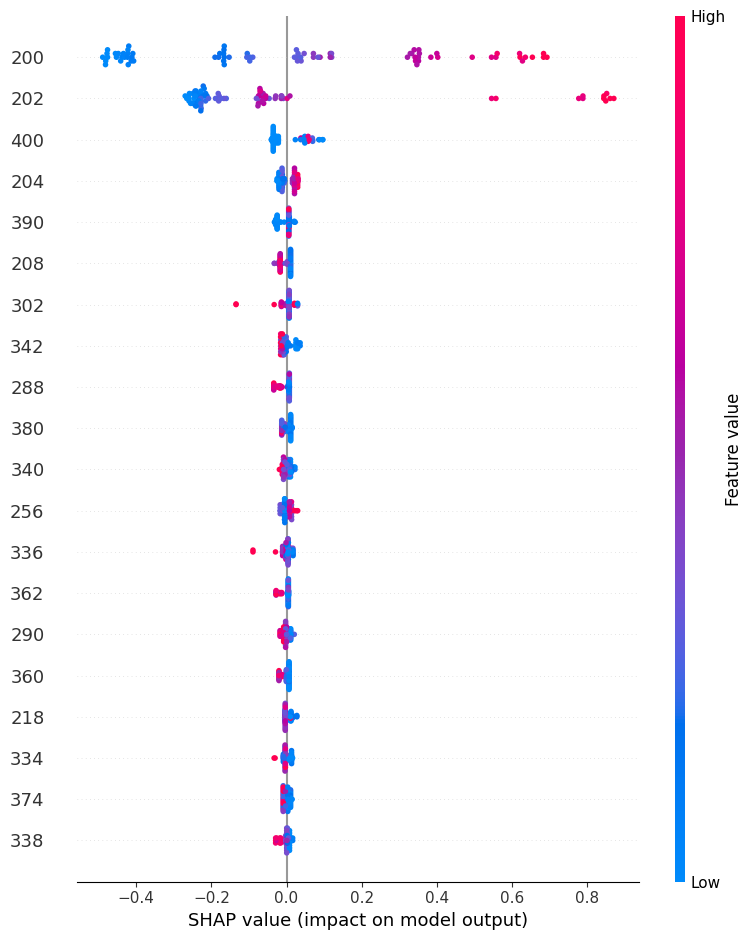

SHAP Summary for CIP


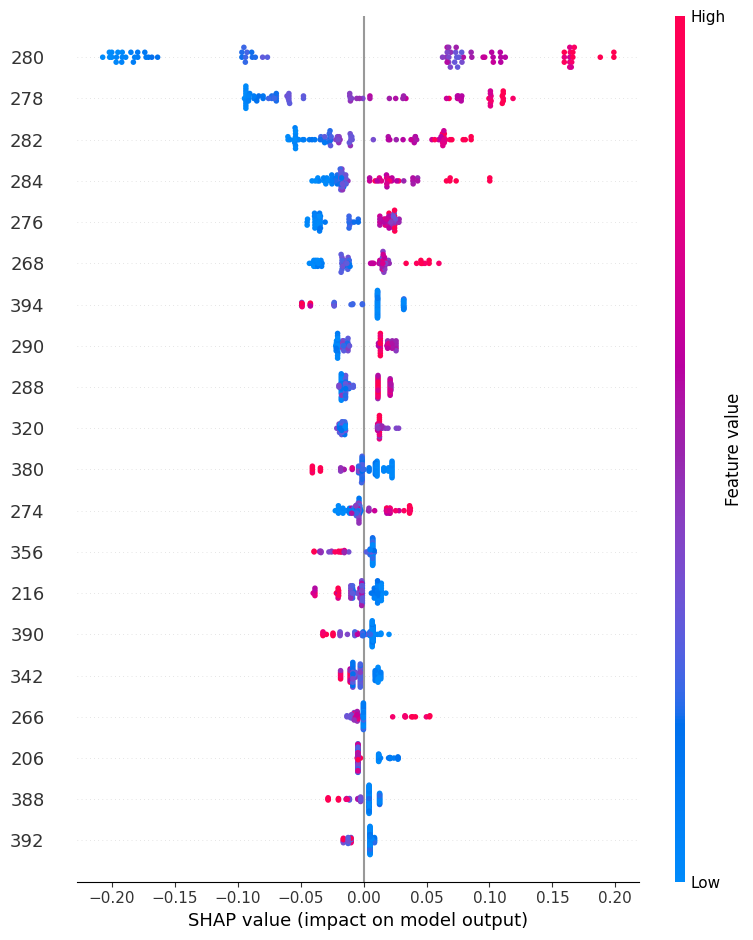

SHAP Summary for TC


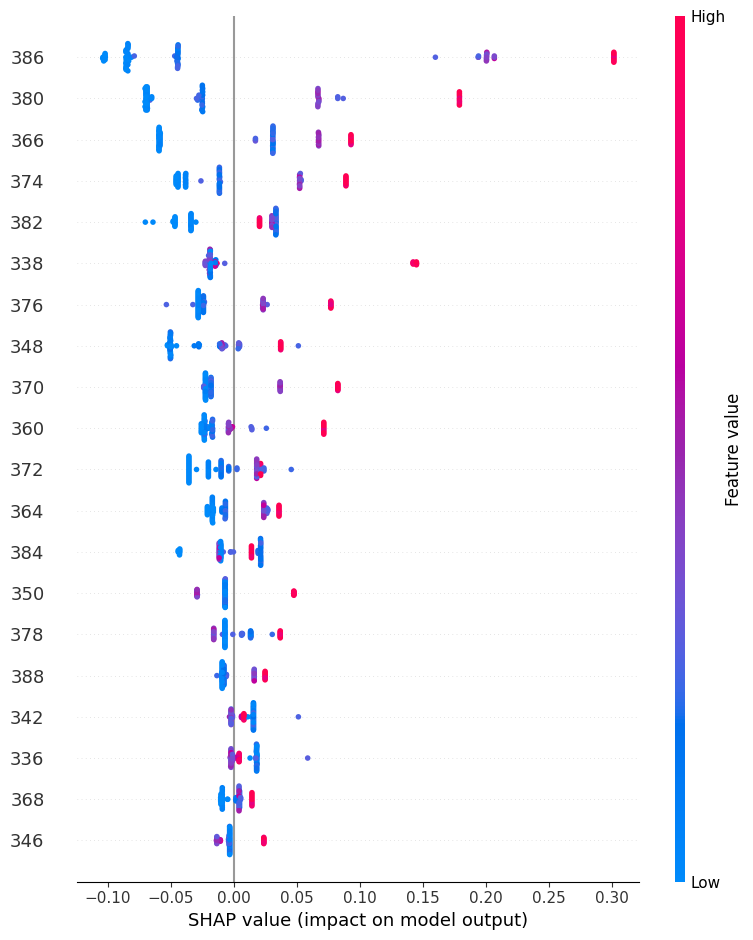

In [13]:
for target, model in final_models.items():
    explainer = shap.Explainer(model)
    shap_values = explainer(X)
    print(f"SHAP Summary for {target}")
    shap.summary_plot(shap_values, X)


## Data visualization

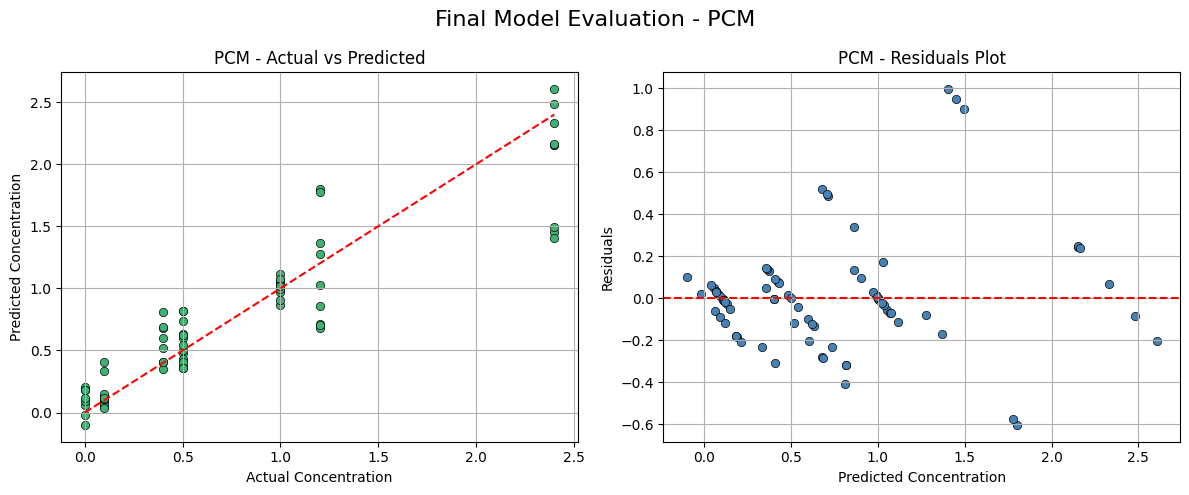

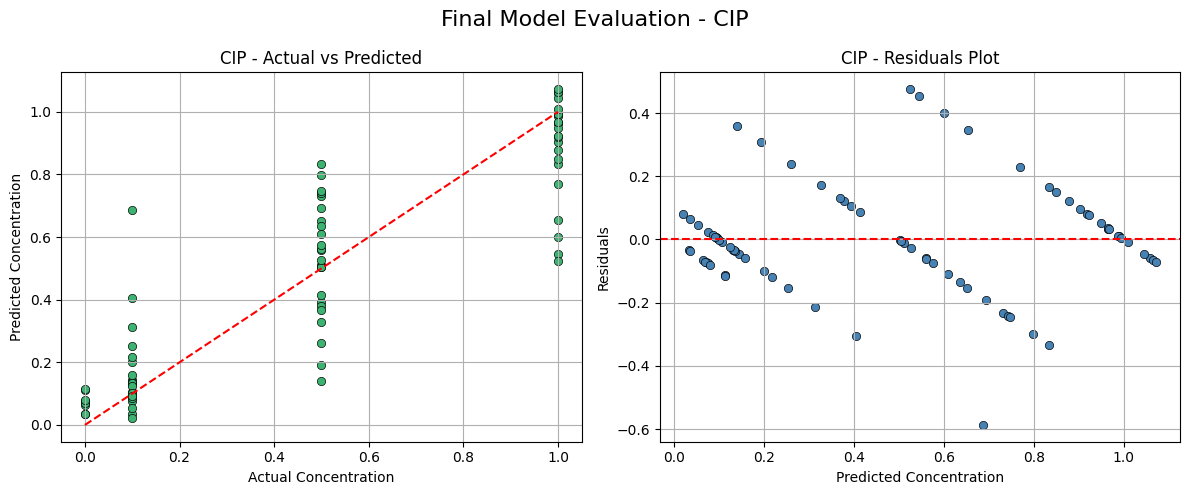

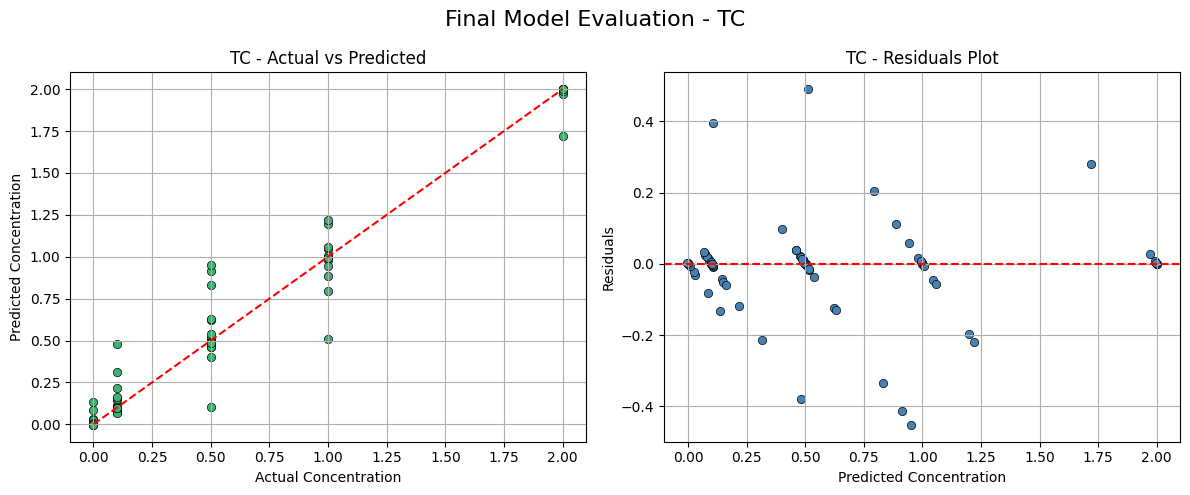

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for target in ['PCM', 'CIP', 'TC']:
    actuals = []
    predictions = []
    residuals = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[target].iloc[train_idx], y[target].iloc[test_idx]

        # Use final tuned Gradient Boosting model
        model = GradientBoostingRegressor(
            learning_rate=0.1,
            max_depth=2,
            n_estimators=200,
            random_state=42
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        actuals.extend(y_test)
        predictions.extend(y_pred)
        residuals.extend(y_test - y_pred)

    # Create DataFrame for plotting
    results_df = pd.DataFrame({
        'Actual': actuals,
        'Predicted': predictions,
        'Residuals': residuals
    })

    # --- Plot Actual vs Predicted ---
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x='Actual', y='Predicted', data=results_df, color='mediumseagreen', edgecolor='black')
    plt.plot([min(results_df['Actual']), max(results_df['Actual'])],
             [min(results_df['Actual']), max(results_df['Actual'])],
             color='red', linestyle='--')
    plt.title(f"{target} - Actual vs Predicted")
    plt.xlabel("Actual Concentration")
    plt.ylabel("Predicted Concentration")
    plt.grid(True)

    # --- Plot Residuals ---
    plt.subplot(1, 2, 2)
    sns.scatterplot(x='Predicted', y='Residuals', data=results_df, color='steelblue', edgecolor='black')
    plt.axhline(0, linestyle='--', color='red')
    plt.title(f"{target} - Residuals Plot")
    plt.xlabel("Predicted Concentration")
    plt.ylabel("Residuals")
    plt.grid(True)

    plt.suptitle(f"Final Model Evaluation - {target}", fontsize=16)
    plt.tight_layout()
    plt.show()


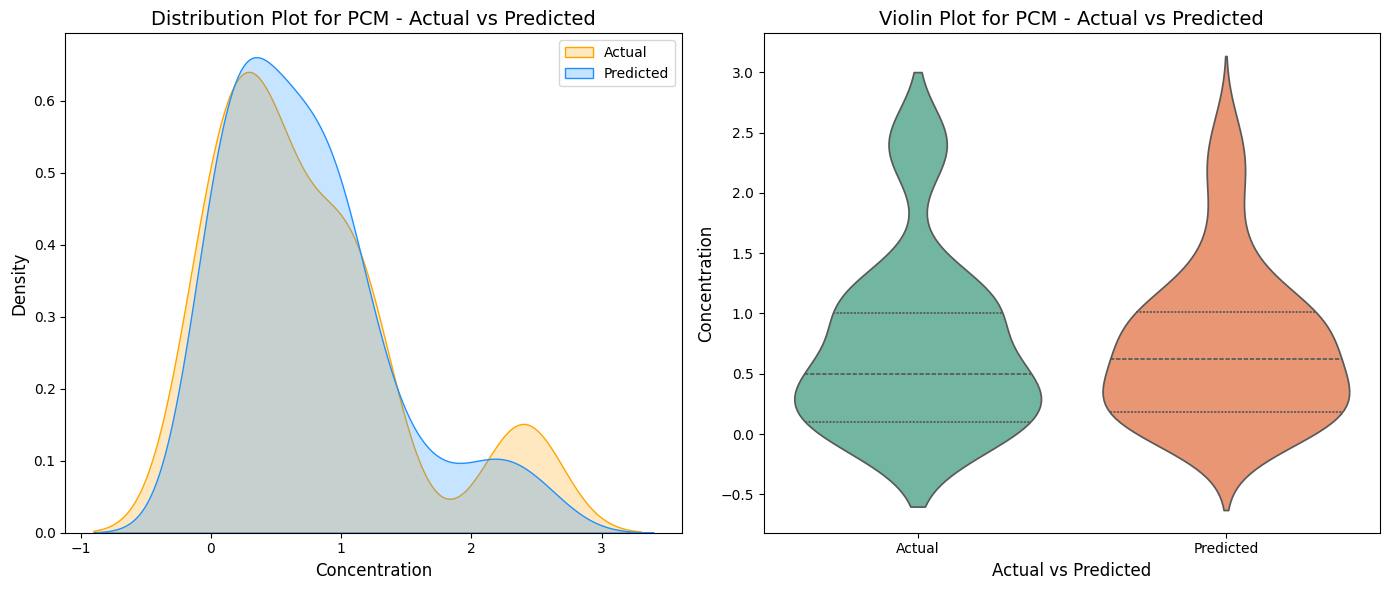

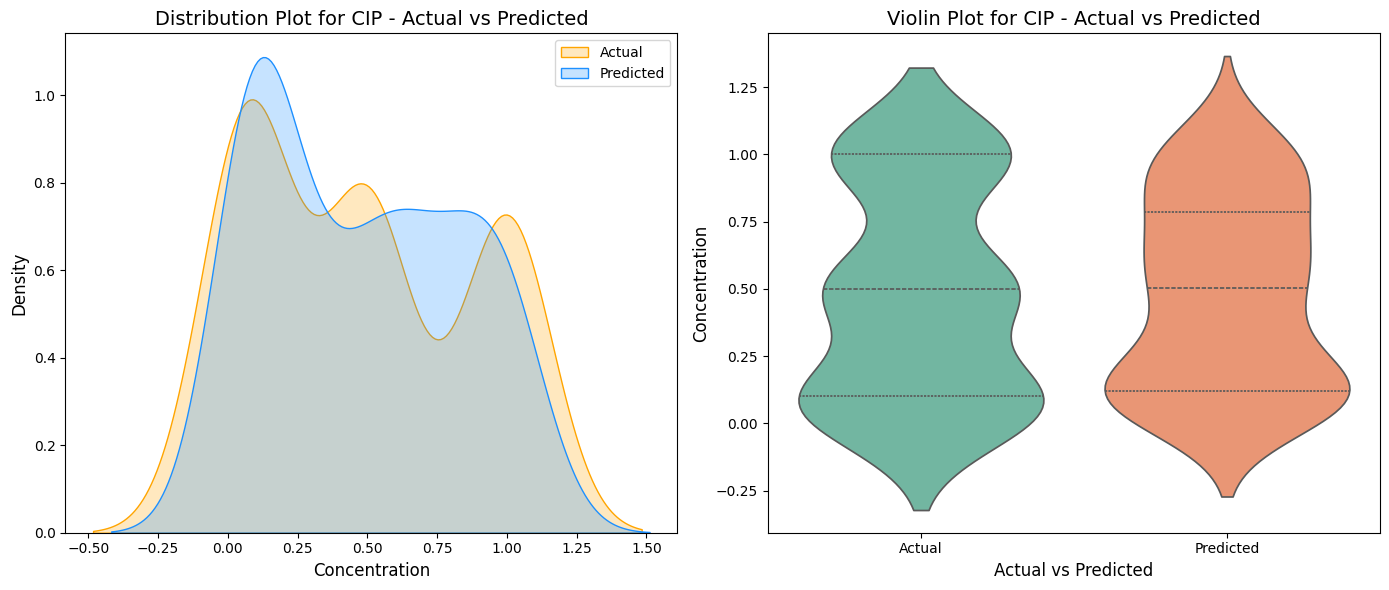

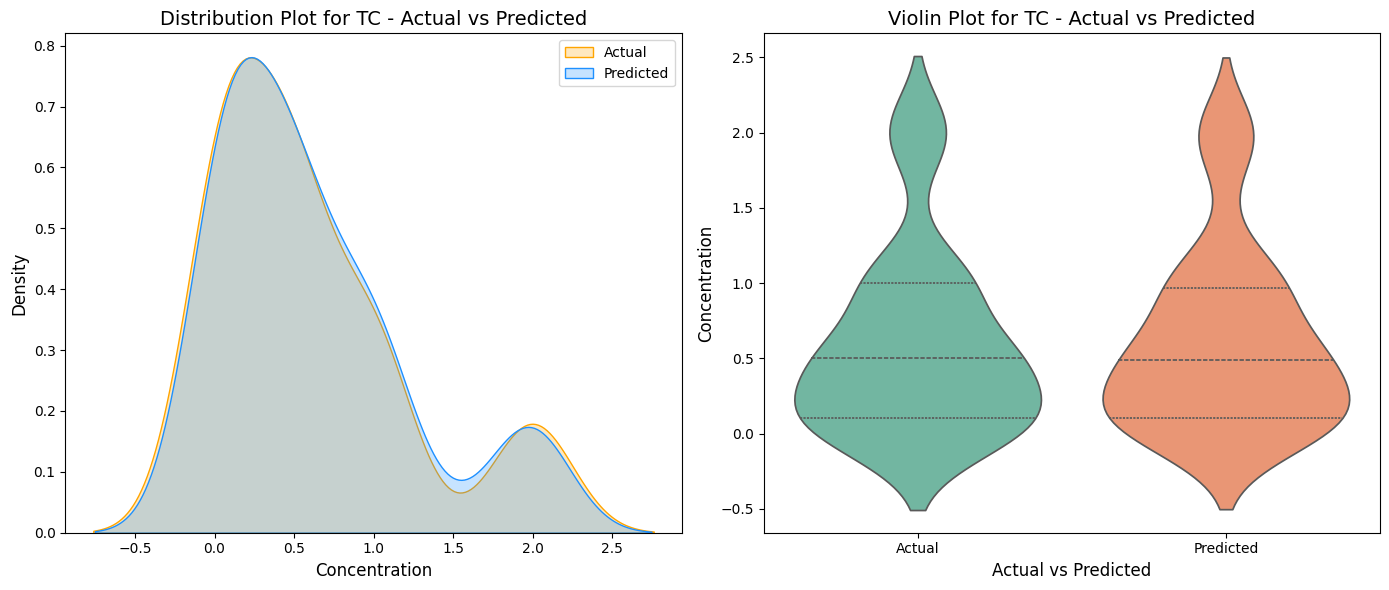

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Use Seaborn's brighter color palette
sns.set_palette("Set2")  # Bright color palette for better visibility

# Function to generate plots for each target
for target in ['PCM', 'CIP', 'TC']:
    actuals = []
    predictions = []
    residuals = []

    # Perform cross-validation and gather actual vs predicted values
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[target].iloc[train_idx], y[target].iloc[test_idx]

        # Final tuned Gradient Boosting model
        model = GradientBoostingRegressor(
            learning_rate=0.1,
            max_depth=2,
            n_estimators=200,
            random_state=42
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        actuals.extend(y_test)
        predictions.extend(y_pred)
        residuals.extend(y_test - y_pred)

    # Create a DataFrame for visualization
    results_df = pd.DataFrame({
        'Actual': actuals,
        'Predicted': predictions,
        'Residuals': residuals
    })

    # --- Plot Distribution of Actual vs Predicted ---
    plt.figure(figsize=(14, 6))

    # Plot KDE (Kernel Density Estimate) for Actual vs Predicted
    plt.subplot(1, 2, 1)
    sns.kdeplot(results_df['Actual'], color='orange', label='Actual', shade=True)
    sns.kdeplot(results_df['Predicted'], color='dodgerblue', label='Predicted', shade=True)
    plt.title(f"Distribution Plot for {target} - Actual vs Predicted", fontsize=14)
    plt.xlabel("Concentration", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend()

    # --- Plot Violin Plot for Actual vs Predicted ---
    plt.subplot(1, 2, 2)
    sns.violinplot(x='variable', y='value', data=pd.melt(results_df[['Actual', 'Predicted']]), inner="quart", palette="Set2")
    plt.title(f"Violin Plot for {target} - Actual vs Predicted", fontsize=14)
    plt.xlabel("Actual vs Predicted", fontsize=12)
    plt.ylabel("Concentration", fontsize=12)
    plt.xticks([0, 1], ['Actual', 'Predicted'])

    plt.tight_layout()
    plt.show()